In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
usa = gpd.read_file('/Users/qingyao/OneDrive - cumc.columbia.edu/machine_learning_data/cb_2020_us_county_500k/cb_2020_us_county_500k.shp')

In [5]:
usa_main = usa[~usa['STATEFP'].isin(["02","15","60","66","69","71","72","78"])]

In [89]:
real_data_path = '/Users/qingyao/OneDrive - cumc.columbia.edu/machine_learning_data/'
cases = pd.read_csv(real_data_path + 'county_data/ts_covid19_confirmed_US_mainland.csv')

In [68]:
col_idx = list(range(40,41+315))
col_idx.append(4)

In [69]:
s_cases = cases.iloc[:,col_idx]

In [31]:
dates_col = cases.columns[40:41+315]

In [93]:
cases[cases.FIPS == 36061]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,03/01/2023,03/02/2023,03/03/2023,03/04/2023,03/05/2023,03/06/2023,03/07/2023,03/08/2023,03/09/2023
1824,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,...,595118,595203,595458,595628,595628,595628,596044,596132,596196,596334


In [94]:
cases.iloc[1824,40:41+315].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 5, 5, 12, 24,
       27, 45, 84, 112, 172, 241, 402, 737, 1174, 1544, 2066, 2673, 3078,
       3520, 4062, 4585, 5216, 5806, 6228, 6876, 8173, 8997, 9625, 10212,
       10878, 11573, 11984, 12365, 13119, 13754, 14323, 14913, 15433,
       15755, 16032, 16440, 16900, 17348, 17719, 18057, 18259, 18454,
       18847, 19233, 19633, 20043, 20458, 20609, 20719, 21027, 21354,
       21646, 21866, 22114, 22257, 22363, 22587, 22833, 23000, 23120,
       23225, 23303, 23400, 23595, 23760, 23919, 24073, 24213, 24267,
       24318, 24451, 24618, 24784, 24929, 25082, 25131, 25202, 25273,
       25401, 25511, 25610, 25684, 25724, 25750, 25829, 25901, 25976,
       26064, 26117, 26152, 26179, 26260, 26327, 26397, 26456, 26517,
       26542, 26571, 26634, 26702, 26772, 26830, 26887, 26933, 26960,
       27025, 27106, 27179, 27225, 27289, 27327, 27371, 27452, 27548,
       27634, 27716, 27768, 27804, 27836, 27917, 28011, 28134, 28224,
       282

In [71]:
daily_cases = np.diff(np.array(s_cases[dates_col]),axis=1)

In [74]:
np.where(daily_cases<0)[0]

array([   5,    6,    6, ..., 3107, 3107, 3107])

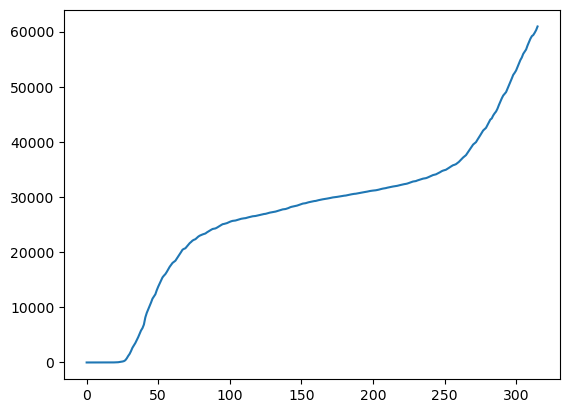

In [95]:
plt.plot(s_cases.iloc[1824,:-1].values)

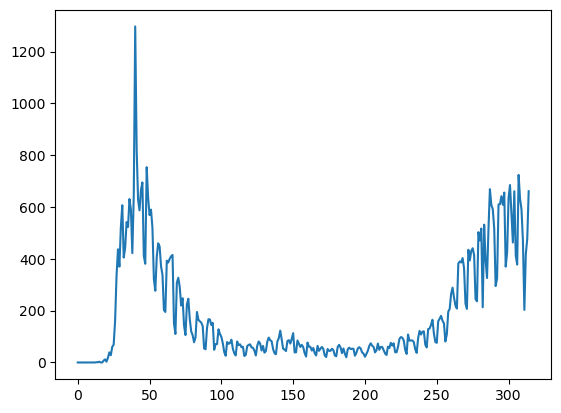

In [96]:
plt.plot(np.diff(s_cases.iloc[1824,:-1].values))

In [57]:
s_cases.iloc[:,1:316] = daily_cases 

/var/folders/vx/g_l159t12yb63094n730n4pm0000gn/T/ipykernel_11452/2413632603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_cases.iloc[:,1:316] = daily_cases


In [10]:
usa_main.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry'],
      dtype='object')

In [11]:
usa_main = usa_main.set_index('GEOID').join(cases.set_index('FIPS'))

In [ ]:
dates = data.columns[1:]  # dates

# create a directory to save the plots
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

for i, date in enumerate(dates):
    fig, ax = plt.subplots(1, figsize=(10, 6))
    usa.plot(column=date, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Title for ' + date, fontdict={'fontsize': '25', 'fontweight' : '3'})
    fig.savefig("plots/map_{}.png".format(i), dpi=300)
    plt.close(fig)